# Medical Cost Regression Prediction Project

## Introduction

Every year, millions of people grapple with the same uncertainty: "How much should I budget for healthcare?" In a world of rising medical expenses, the cost of health insurance can feel like a black box. What truly drives the price of a premium? Is it age? Lifestyle choices? Where you live? For many of us, these are just guesses. But what if we could use data to bring some clarity to the chaos?

This project dives headfirst into that very question. The goal is to build a machine learning model that can predict an individual's annual medical expenses. This isn't just an academic exercise; it's an attempt to demystify a system that impacts us all. By understanding the key factors that influence healthcare costs, we can empower individuals to make more informed decisions and gain a clearer picture of the financial realities of health and wellness.

#### The Tool for the Job: The Medical Cost Personal Dataset

To tackle this challenge, we'll be using the "Medical Cost Personal Dataset," a popular dataset from the online data science platform, Kaggle. This dataset provides a clean, anonymized snapshot of 1,338 individuals and their insurance charges. It contains a perfect blend of demographic and personal information, making it an ideal playground for a regression project.

The dataset is broken down into the following key features:
- age: The age of the primary beneficiary.
- sex: The gender of the policyholder (male or female).
- bmi: Body Mass Index, providing a general sense of body weight relative to height.
- children: The number of children covered by the health insurance policy.
- smoker: A simple "yes" or "no" indicating if the person smokes.
- region: The beneficiary's residential area in the US (northeast, southeast, southwest, northwest).
- charges: And finally, our target variable—the individual medical costs billed by the health insurance for the year.

The mission is to use the first six features to build a model that accurately predicts the charges. We will start with one of the most fundamental techniques in a data scientist's toolkit, linear regression, and then experiment with different approaches to see just how accurate we can get.

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [31]:
df = pd.read_csv("insurance.csv")

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory Data Analysis (EDA) - Understanding the Data

Before building a model, we must understand the data. EDA helps us check for errors, identify patterns, and discover relationships between variables.

`info()` tells us the data types of each column and if there are any missing values. `describe()` gives us key statistical measures for the numerical columns, helping us spot outliers or unusual distributions.

In [32]:
# Get a concise summary of the dataframe
print("Dataframe Information:")
df.info()

print("\n" + "="*50 + "\n")

# Get descriptive statistics for numerical columns
print("Descriptive Statistics:")
df.describe()

Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Descriptive Statistics:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Key Takeaways:

`df.info()` Output: You'll see there are 1338 entries and no missing values (all columns have 1338 non-null entries). This is great because it means less cleaning! The `sex`, `smoker`, and `region` columns are of type `object`, which means they are text-based (categorical) and will need to be converted to numbers later.

`df.describe()` Output:

- The average `age` is around 39.

- The mean `bmi` is 30.6, which is in the "obese" category.

- The `charges` vary wildly, from a minimum of $1,121 to a maximum of $63,770, with a high standard deviation. This suggests the data is very spread out and likely skewed.

### Here are some visualizations to help us better understand the data and identify any trends or patterns.

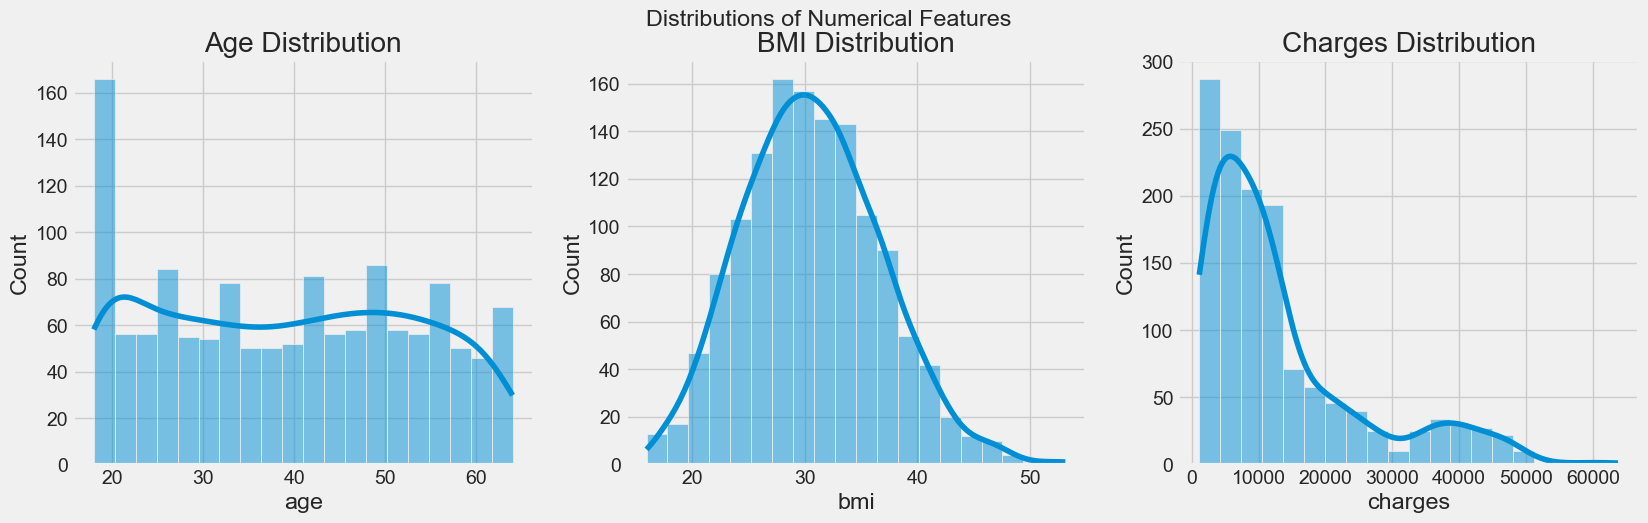

In [33]:
# Create subplots for the numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distributions of Numerical Features')

# Age distribution
sns.histplot(df['age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

# BMI distribution
sns.histplot(df['bmi'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('BMI Distribution')

# Charges distribution
sns.histplot(df['charges'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Charges Distribution')

plt.show()

### Key Takeaways:

Age: The distribution is fairly uniform, with a slight peak for people in their early 20s.

BMI: The distribution looks like a normal distribution (a bell curve), centered around 30.

Charges: This distribution is heavily right-skewed. Most people have low medical charges, while a few have very high charges. This skew is something we might need to address later (e.g., using a log transformation) to help our linear regression model.

### Categorical Features vs. Charges

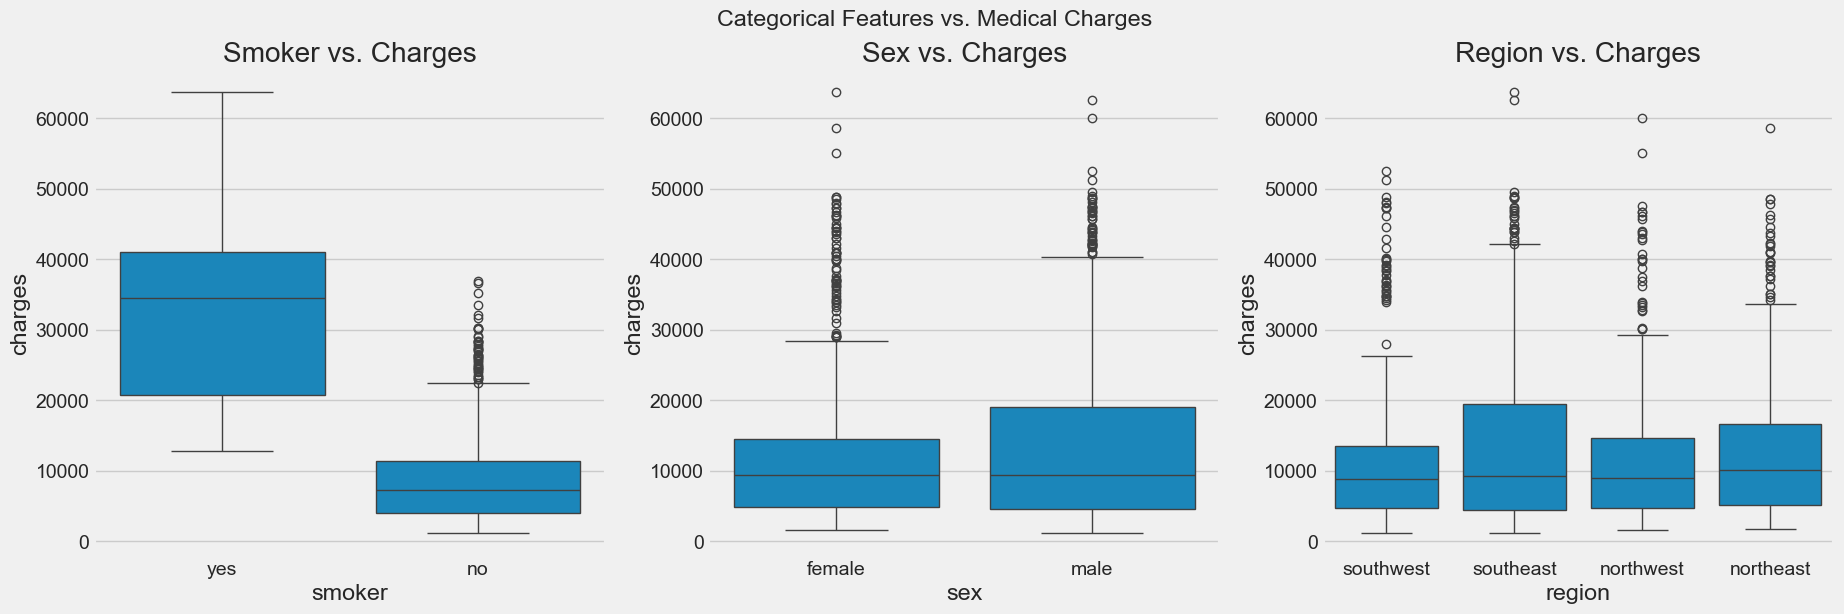

In [34]:
# Create subplots for categorical features vs. charges
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Categorical Features vs. Medical Charges')

# Smoker vs Charges
sns.boxplot(x='smoker', y='charges', data=df, ax=axes[0])
axes[0].set_title('Smoker vs. Charges')

# Sex vs Charges
sns.boxplot(x='sex', y='charges', data=df, ax=axes[1])
axes[1].set_title('Sex vs. Charges')

# Region vs Charges
sns.boxplot(x='region', y='charges', data=df, ax=axes[2])
axes[2].set_title('Region vs. Charges')

plt.show()

### Key Takeaways:

Smoker vs. Charges: This is the most dramatic plot. Smokers have significantly higher medical charges than non-smokers. This feature will be a very strong predictor!

Sex vs. Charges: There isn't a huge difference in charges between males and females on average.

Region vs. Charges: The distributions are similar across regions, though the southeast region seems to have slightly higher charges.

### Numerical Feature Correlation

Gives us a quick, color-coded overview of how strongly the numerical variables are related to each other. Values close to +1 or -1 indicate a strong relationship.

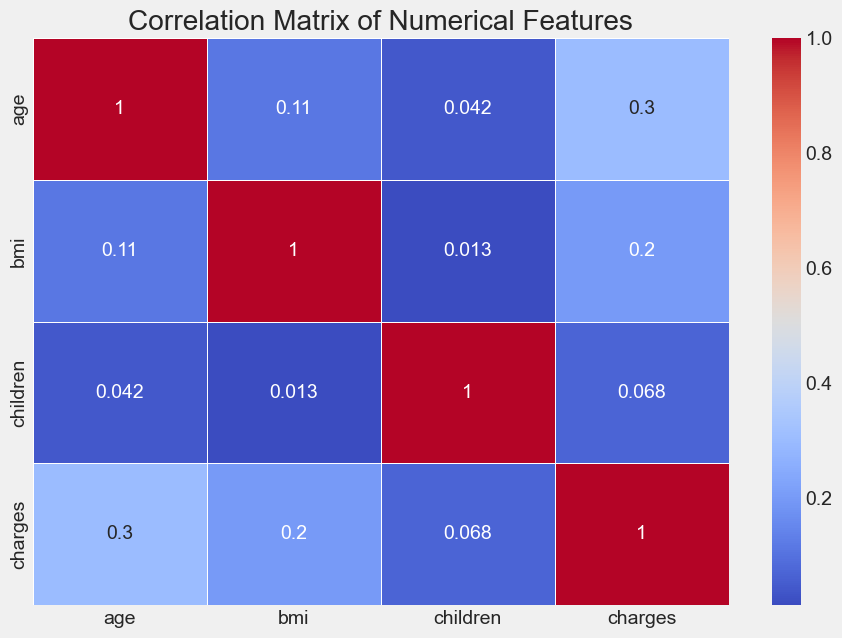

In [35]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Key Takeaways:

age and charges have a moderate positive correlation (0.30). This makes sense; as people get older, their medical costs tend to increase.

bmi and charges have a weaker positive correlation (0.20).

None of the predictor variables (age, bmi, children) are strongly correlated with each other, which is good as it means they provide unique information to the model.

## Data Cleaning and Pre-processing

Machine learning models require all input data to be numerical. Our dataset has categorical columns (sex, smoker, region) that we need to convert. This is a critical pre-processing step before we can train our regression model.

In [ ]:
# Check for missing values again just to be sure
print("Missing values per column:")
print(df.isnull().sum())

# Since there are no missing values, we can proceed to encoding.
print("\nConverting categorical features to numerical...")

# Use pandas get_dummies for one-hot encoding
df_processed = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

# Convert boolean columns (True/False) created by get_dummies to integers (1/0)
df_processed['sex_male'] = df_processed['sex_male'].astype(int)
df_processed['sex_female'] = df_processed['sex_female'].astype(int)
df_processed['smoker_yes'] = df_processed['smoker_yes'].astype(int)
df_processed['smoker_no'] = df_processed['smoker_no'].astype(int)
df_processed['region_northwest'] = df_processed['region_northwest'].astype(int)
df_processed['region_northeast'] = df_processed['region_northeast'].astype(int)
df_processed['region_southeast'] = df_processed['region_southeast'].astype(int)
df_processed['region_southwest'] = df_processed['region_southwest'].astype(int)

df_processed

Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Converting categorical features to numerical...


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


The original sex column is now sex_male / sex_female. A 1 means the person is male, and a 0 means they are female.

The smoker column is now smoker_yes / smoker_no. A 1 means they are a smoker, and 0 means they are not.

The region column was split into three (four) columns. For example, if a person is from the "southwest", region_southwest will be 1 and the other region columns will be 0. The "northeast" region is implicitly represented when all other region columns are 0. We have that for all four regions.

## Experiment 1: Modelling

We need to explicitly tell the model which column we want to predict (the target, y) and which columns it should use to make the prediction (the features, X).

In [37]:
# 'charges' is the target variable we want to predict
y = df_processed['charges']

# All other columns are the features the model will use
X = df_processed.drop('charges', axis=1)

# Display the first few rows of our features and target to confirm
print("--- Features (X) ---")
print(X.head())

print("\n--- Target (y) ---")
print(y.head())

--- Features (X) ---
   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0   19  27.900         0           1         0          0           1   
1   18  33.770         1           0         1          1           0   
2   28  33.000         3           0         1          1           0   
3   33  22.705         0           0         1          1           0   
4   32  28.880         0           0         1          1           0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 0                 0                 1  
1                 0                 0                 1                 0  
2                 0                 0                 1                 0  
3                 0                 1                 0                 0  
4                 0                 1                 0                 0  

--- Target (y) ---
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47

#### Splitting Data into Training and Testing Sets. 

This is a crucial step for a fair evaluation. The model will only see the training data. We hold back the testing data to simulate how the model would perform in the real world on data it hasn't seen before. A common split is 80% for training and 20% for testing. We also create an instance of the LinearRegression model from the scikit-learn library and then "fit" it to our training data. We use our trained model to predict the medical charges for the test set (X_test), which it has never seen before.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = lr_model.predict(X_test)

# Display the first 5 predictions and compare them to the actual values
predictions_df = pd.DataFrame({'Actual Charges': y_test, 'Predicted Charges': y_pred})
predictions_df.head()

Training set size: 1070 samples
Testing set size: 268 samples


,Actual Charges,Predicted Charges
764,9095.06825,8969.550274
887,5272.17580,7068.747443
890,29330.98315,36858.410912
1293,9301.89355,9454.678501
259,33750.29180,26973.173457


We compare the model's predictions (y_pred) to the true values (y_test) to calculate the error.

Mean Squared Error (MSE): We find the average of the squared differences between actual and predicted values.

Root Mean Squared Error (RMSE): Then, we take the square root of the MSE to bring the error metric back to the original units (dollars).

In [39]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

Mean Squared Error (MSE): 33596915.85
Root Mean Squared Error (RMSE): $5796.28


For the first experiment, the model's predictions are, on average, about $5,796 off from the actual medical charges. This is a relatively high error rate, but it's not too bad considering the simple model we've used. This is also the baseline performance for our first model.